In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#!ls drive/My\ Drive/CNN_biometrics/new_one/dbFP

# creating dataset

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.feature import greycomatrix, greycoprops
from skimage import io
import numpy as np

In [0]:
#fp1 = io.imread("/content/drive/My Drive/CNN_biometrics/new_one/dbFP/a001_05.pgm")
#plt.imshow(fp1, cmap=plt.cm.gray, interpolation='nearest', vmin=0, vmax=255)
#plt.show()

# foreground features

In [0]:
PATCH_SIZE = 28
fgPatch = []

for line in open("/content/drive/My Drive/CNN_biometrics/new_one/dbFP/fingerprint_fg.txt"):
    
    if(len(line) != 1):

        if(".pgm" in line):
            fpImage_filePath = "/content/drive/My Drive/CNN_biometrics/new_one/dbFP/" + line[:-1]
           # print(fpImage_filePath)
            imageFP = io.imread(fpImage_filePath)
            fg_locations = []
            
        
        else:
            locs = line.split()
            
            for elem in locs:
                iLoc = elem
                
                iLoc = iLoc.split(",")
#                 print(iLoc)
                
                rLoc = iLoc[0][1:]
                cLoc = iLoc[1][:-1]
                
                pair = tuple([int(rLoc), int(cLoc)])
                #print(pair)
                #print(type(pair))
                
                fg_locations.append(pair)
                
            #print(fg_locations)
            
            for loc in fg_locations:
                patch = imageFP[loc[0] : loc[0] + PATCH_SIZE,
                               loc[1] : loc[1] + PATCH_SIZE]
               # print("loc::::::::::::::::::::::::::::::::::::::")
               # print(loc)
               # print("patch::::::::::::::::::::::::::::::::::::")
               # print(patch)
                
                fgPatch.append(patch)
        

In [0]:
#len(fgPatch)

In [0]:
#fgPatch

In [0]:
#plt.imshow(fgPatch[14], cmap=plt.cm.gray, interpolation='nearest',vmin=0, vmax=255)
#plt.show()

In [0]:
X_fg = np.array(fgPatch)

In [0]:
#X_fg.shape

In [0]:
y_fg = np.array([1 for i in range(len(fgPatch))]).reshape(-1,1)
y_fg = y_fg.astype(dtype=np.int32)

In [0]:
#y_fg.shape

In [0]:
#print(y_fg.dtype)
#y_fg

# background features

In [0]:
PATCH_SIZE = 28
bgPatch = []

for line in open("/content/drive/My Drive/CNN_biometrics/new_one/dbFP/fingerprint_bg.txt"):
    #print(len(line))
    
    if(len(line) != 1):

        if(".pgm" in line):
            fpImage_filePath = "/content/drive/My Drive/CNN_biometrics/new_one/dbFP/" + line[:-1]
           # print(fpImage_filePath)
            imageFP = io.imread(fpImage_filePath)
            bg_locations = []
            
        
        else:
            locs = line.split()
            #print(locs)
            
            for elem in locs:
                iLoc = elem
                #print(elem)
                
                iLoc = iLoc.split(",")
                #print(iLoc)
                
                rLoc = iLoc[0][1:]
                cLoc = iLoc[1][:-1]
                
                pair = tuple([int(rLoc), int(cLoc)])
                #print(pair)
                #print(type(pair))
                
                bg_locations.append(pair)
                
           # print(bg_locations)
            
            for loc in bg_locations:
                patch = imageFP[loc[0] : loc[0] + PATCH_SIZE,
                               loc[1] : loc[1] + PATCH_SIZE]
               # print("loc::::::::::::::::::::::::::::::::::::::")
              #  print(loc)
             #   print("patch::::::::::::::::::::::::::::::::::::")
            #    print(patch)
                
                bgPatch.append(patch)
        

In [0]:
#len(bgPatch)

In [0]:
X_bg = np.array(bgPatch)

In [0]:
#X_bg.shape

In [0]:
y_bg = np.array([0 for i in range(len(bgPatch))]).reshape(-1,1)
y_bg = y_bg.astype(dtype=np.int32)

In [0]:
#y_bg.shape

In [0]:
X = np.concatenate([X_fg, X_bg])

In [0]:
#X.shape

In [0]:
y = np.concatenate([y_fg, y_bg])

In [0]:
#y.shape

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

# save npz array

In [0]:
np.savez('fingerprint_data.npz', 
         Xtrain = X_train, Xtest = X_test,ytrain = y_train,ytest = y_test)

# CNN model architecture

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
tf.set_random_seed(42)
np.random.seed(42)

In [0]:
def loadNpData():
    data = np.load('fingerprint_data.npz')
    X_train = data['Xtrain']
    X_test = data['Xtest']
    y_train = data['ytrain']
    y_test= data['ytest']
    
    
    return X_train,X_test,y_train,y_test

In [0]:
X_train,X_test,y_train,y_test = loadNpData()

In [29]:
print(X_train.shape)

(400, 28, 28)


In [30]:
print(X_test.shape)

(100, 28, 28)


In [31]:
print(y_test.shape)

(100, 1)


In [32]:
print(y_train.shape)

(400, 1)


In [0]:
model_cnn = keras.models.Sequential()

In [34]:
model_cnn.add(keras.layers.Conv2D(filters = 32,kernel_size = 7,padding = "same",activation = 'relu',input_shape = [28,28,1]))
#model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.MaxPool2D(pool_size = 2))
model_cnn.add(keras.layers.Conv2D(filters = 64,kernel_size = 3,padding = "same",activation = 'relu'))
#model_cnn.add(keras.layers.BatchNormalization())
model_cnn.add(keras.layers.MaxPool2D(pool_size = 2))
model_cnn.add(keras.layers.Conv2D(filters = 32,kernel_size = 3,padding = "same",activation = 'relu'))
model_cnn.summary()

W0816 08:37:01.592044 139815565391744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          18464     
Total params: 38,560
Trainable params: 38,560
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(units = 128,activation = 'relu'))
#model_cnn.add(keras.layers.BatchNormalization())
#model_cnn.add(keras.layers.Dropout(0.5))
model_cnn.add(keras.layers.Dense(units = 64,activation = 'relu'))
#model_cnn.add(keras.layers.BatchNormalization())
#model_cnn.add(keras.layers.Dropout(0.5))
model_cnn.add(keras.layers.Dense(units = 2,activation = 'softmax'))
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [0]:
model_cnn.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [0]:
X_train = X_train[...,np.newaxis]
X_test = X_test[...,np.newaxis]

In [0]:
callbacks = [keras.callbacks.EarlyStopping(patience = 5),keras.callbacks.ModelCheckpoint("/content/drive/My Drive/CNN_biometrics/biometrics_model.h5",save_best_only = True)]

In [39]:
history_cnn = model_cnn.fit(X_train,y_train,epochs = 25,validation_split=0.1,callbacks=callbacks)

Train on 360 samples, validate on 40 samples
Epoch 1/25
360/360 [==============================] - 2s 6ms/sample - loss: 12.4555 - acc: 0.5556 - val_loss: 0.8320 - val_acc: 0.5750
Epoch 2/25
360/360 [==============================] - 0s 152us/sample - loss: 0.5742 - acc: 0.7028 - val_loss: 1.3203 - val_acc: 0.5250
Epoch 3/25
360/360 [==============================] - 0s 286us/sample - loss: 0.7455 - acc: 0.6750 - val_loss: 0.5606 - val_acc: 0.6250
Epoch 4/25
360/360 [==============================] - 0s 152us/sample - loss: 0.4975 - acc: 0.7556 - val_loss: 1.0904 - val_acc: 0.5000
Epoch 5/25
360/360 [==============================] - 0s 314us/sample - loss: 0.5256 - acc: 0.7389 - val_loss: 0.3107 - val_acc: 0.9500
Epoch 6/25
360/360 [==============================] - 0s 278us/sample - loss: 0.3052 - acc: 0.8972 - val_loss: 0.2247 - val_acc: 0.9250
Epoch 7/25
360/360 [==============================] - 0s 149us/sample - loss: 0.2416 - acc: 0.9194 - val_loss: 0.4364 - val_acc: 0.8000
Epoc

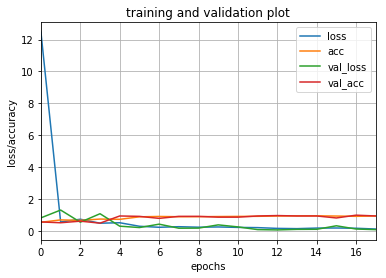

In [40]:
import pandas as pd
pd.DataFrame(history_cnn.history).plot()
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.title("training and validation plot")
plt.show()

In [41]:
test_loss,test_accuracy = model_cnn.evaluate(X_test,y_test)

100/100 [==============================] - 0s 300us/sample - loss: 0.1126 - acc: 0.9500


In [42]:
best_model = keras.models.load_model("/content/drive/My Drive/CNN_biometrics/biometrics_model.h5")

W0816 08:37:06.872303 139815565391744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0816 08:37:06.874056 139815565391744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [43]:
print("test-loss: %f, test-accuracy: %f" %(test_loss,test_accuracy))

test-loss: 0.112620, test-accuracy: 0.950000
